# Green Guard Demo Data

This notebook shows the steps performed to generate the demo data used in the README examples.

The source of the data is the project by Cohen, Elliot J. "Wind Analysis." Joint Initiative of the ECOWAS Centre for Renewable Energy and Energy Efficiency (ECREEE), The United Nations Industrial Development Organization (UNIDO) and the Sustainable Engineering Lab (SEL). Columbia University, 22 Aug. 2014. Available online: <https://github.com/Ecohen4/ECREEE>.

The overall goal of the manipulation is to come up with individual readings from several signals and a list of target values to predict.

One of the main challenges was that the signal values were monotonically increasing, implying that they were accumulated values instead of individual readings. This accumulation has been reverted by replacing all the values with their difference to the next one.

Overall, the following steps have been performed:

1. For each column, compute the differences between one value and the next one
2. Fix some gaps in the Grid KWH Production column
3. Generate Zero Production labels indicating whether the Grid KWH Production was 0 at any point during the day.
4. Generate a labels table with labels and cutoff times by shifting the Zero Production labels by one day.
5. Generate a signals table associating each signal column name with a signal_id.
6. Generate a turbines table with a single row and turbine_id
7. Generate a readings table by stacking all the signals as only two columns, timestamp and value, properly identified by signal_id and turbine_id.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

## Download the source data

In [3]:
data = pd.read_csv('https://github.com/Ecohen4/data-viz/blob/master/r/WIND_VXE_2013.csv?raw=true')

In [4]:
data.shape

(52560, 19)

In [12]:
data.head(10)

,WTG01_Grid Production PossiblePower Avg. (1),WTG02_Grid Production PossiblePower Avg. (2),WTG03_Grid Production PossiblePower Avg. (3),WTG04_Grid Production PossiblePower Avg. (4),WTG05_Grid Production PossiblePower Avg. (5),WTG06_Grid Production PossiblePower Avg. (6),WTG07_Grid Production PossiblePower Avg. (7),WTG01_Total Active power (8),WTG02_Total Active power (9),WTG03_Total Active power (10),WTG04_Total Active power (11),WTG05_Total Active power (12),WTG06_Total Active power (13),WTG07_Total Active power (14),MET_Avg. Wind speed 1 (15),MET_Min. Wind speed 1 (16),MET_Max. Wind speed 1 (17),GRID1_KWH_DEL
PCTimeStamp,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,817.0,805.0,786.0,809.0,755.0,745.0,743.0,3109970.0,609852.0,3254759.0,3341303.0,3230186.0,3264175.0,3136754.0,11.3,8.1,14.5,2510065.0
2013-01-01 00:10:00,732.0,790.0,763.0,809.0,771.0,758.0,811.0,3110050.0,609933.0,3254839.0,3341384.0,3230266.0,3264255.0,3136835.0,12.0,9.1,15.4,2510615.0
2013-01-01 00:20:00,764.0,774.0,793.0,821.0,736.0,668.0,656.0,3110130.0,610014.0,3254920.0,3341465.0,3230346.0,3264336.0,3136914.0,11.6,7.1,16.7,2511165.0
2013-01-01 00:30:00,773.0,769.0,759.0,813.0,627.0,717.0,752.0,3110211.0,610095.0,3255002.0,3341546.0,3230421.0,3264417.0,3136994.0,11.8,9.4,14.2,2511714.0
2013-01-01 00:40:00,689.0,690.0,711.0,800.0,749.0,749.0,723.0,3110288.0,610176.0,3255083.0,3341628.0,3230501.0,3264499.0,3137075.0,11.2,8.1,14.3,2512265.0
2013-01-01 00:50:00,735.0,753.0,808.0,830.0,832.0,757.0,797.0,3110366.0,610257.0,3255164.0,3341709.0,3230582.0,3264579.0,3137156.0,11.1,7.1,14.4,2512815.0
2013-01-01 01:00:00,782.0,818.0,736.0,822.0,713.0,638.0,654.0,3110447.0,610338.0,3255244.0,3341790.0,3230662.0,3264660.0,3137234.0,12.0,9.0,14.8,2513365.0
2013-01-01 01:10:00,814.0,796.0,789.0,835.0,747.0,696.0,736.0,3110527.0,610419.0,3255325.0,3341870.0,3230742.0,3264740.0,3137314.0,11.3,6.9,14.5,2513915.0
2013-01-01 01:20:00,730.0,735.0,736.0,805.0,780.0,716.0,683.0,3110604.0,610499.0,3255406.0,3341952.0,3230823.0,3264821.0,3137394.0,11.9,8.6,15.5,2514465.0


## Set the time index

Parse the timestamp column and set it as the index.

In [6]:
timestamp = pd.to_datetime(data[data.columns[0]])

In [7]:
data[data.columns[0]] = timestamp

In [8]:
data.set_index(data.columns[0], inplace=True)

In [9]:
data.head()

,WTG01_Grid Production PossiblePower Avg. (1),WTG02_Grid Production PossiblePower Avg. (2),WTG03_Grid Production PossiblePower Avg. (3),WTG04_Grid Production PossiblePower Avg. (4),WTG05_Grid Production PossiblePower Avg. (5),WTG06_Grid Production PossiblePower Avg. (6),WTG07_Grid Production PossiblePower Avg. (7),WTG01_Total Active power (8),WTG02_Total Active power (9),WTG03_Total Active power (10),WTG04_Total Active power (11),WTG05_Total Active power (12),WTG06_Total Active power (13),WTG07_Total Active power (14),MET_Avg. Wind speed 1 (15),MET_Min. Wind speed 1 (16),MET_Max. Wind speed 1 (17),GRID1_KWH_DEL
PCTimeStamp,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,817.0,805.0,786.0,809.0,755.0,745.0,743.0,3109970.0,609852.0,3254759.0,3341303.0,3230186.0,3264175.0,3136754.0,11.3,8.1,14.5,2510065.0
2013-01-01 00:10:00,732.0,790.0,763.0,809.0,771.0,758.0,811.0,3110050.0,609933.0,3254839.0,3341384.0,3230266.0,3264255.0,3136835.0,12.0,9.1,15.4,2510615.0
2013-01-01 00:20:00,764.0,774.0,793.0,821.0,736.0,668.0,656.0,3110130.0,610014.0,3254920.0,3341465.0,3230346.0,3264336.0,3136914.0,11.6,7.1,16.7,2511165.0
2013-01-01 00:30:00,773.0,769.0,759.0,813.0,627.0,717.0,752.0,3110211.0,610095.0,3255002.0,3341546.0,3230421.0,3264417.0,3136994.0,11.8,9.4,14.2,2511714.0
2013-01-01 00:40:00,689.0,690.0,711.0,800.0,749.0,749.0,723.0,3110288.0,610176.0,3255083.0,3341628.0,3230501.0,3264499.0,3137075.0,11.2,8.1,14.3,2512265.0


## Explore the columns

In [10]:
data.columns

Index(['WTG01_Grid Production PossiblePower Avg. (1)',
       'WTG02_Grid Production PossiblePower Avg. (2)',
       'WTG03_Grid Production PossiblePower Avg. (3)',
       'WTG04_Grid Production PossiblePower Avg. (4)',
       'WTG05_Grid Production PossiblePower Avg. (5)',
       'WTG06_Grid Production PossiblePower Avg. (6)',
       'WTG07_Grid Production PossiblePower Avg. (7)',
       'WTG01_Total Active power (8)', 'WTG02_Total Active power (9)',
       'WTG03_Total Active power (10)', 'WTG04_Total Active power (11)',
       'WTG05_Total Active power (12)', 'WTG06_Total Active power (13)',
       'WTG07_Total Active power (14)', 'MET_Avg. Wind speed 1 (15)',
       'MET_Min. Wind speed 1 (16)', 'MET_Max. Wind speed 1 (17)',
       'GRID1_KWH_DEL'],
      dtype='object')

In [18]:
len(data.columns)

18

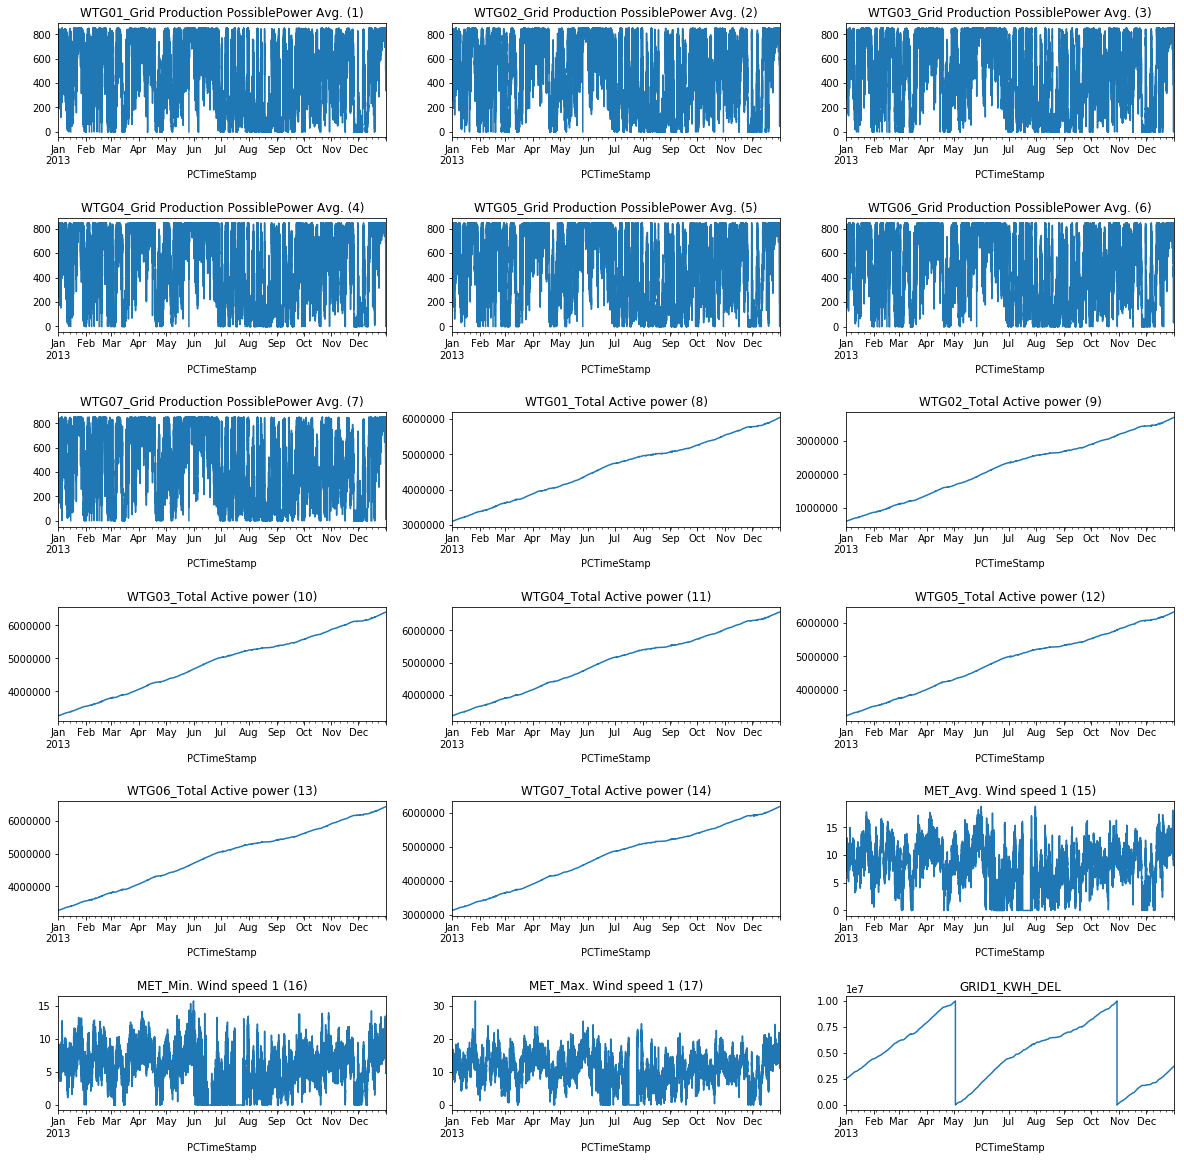

In [30]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 20))
plt.subplots_adjust(hspace=0.7)

for i, column in enumerate(data.columns):
    x = i // 3
    y = i % 3
    data[column].plot(ax=axes[x, y], title=column)

### Comments

By looking at the plots for each column we can see that:

1. All the "Total Active Power" columns seem to be accumulated values. Since we will be working with individual values, the first thing that we will try to do is to decompose all the accumulated signals as individual values.
2. The `GRID1_KWH_DEL` seems to also be an accumulated value, but it has been reset a couple of times, so we will need to account for that reset when computing the individual values.
3. All the other signals have similar and reasonable timeseries patterns so we will not manipulate them.
4. There is one period between July and Aug where the "Wind Speed" is zero (zooming in confirms it, but we will skip the plot to keep this report short). This could be a good source for a prediction problem, but since there seems to be only one such period and we don't know if it is due to a data error or not, we will ignore this for now and look for something else.

## Decompose accumulated signals as individual values

In order to recover the individual values for the accumulated signals we:

1. Calculate the differences between one value and the next one.
2. Fill the first value with the average, to avoid having to discard it.

In [58]:
accum_columns = [
    'WTG01_Total Active power (8)',
    'WTG02_Total Active power (9)',
    'WTG03_Total Active power (10)',
    'WTG04_Total Active power (11)',
    'WTG05_Total Active power (12)',
    'WTG06_Total Active power (13)',
    'WTG07_Total Active power (14)',
    'GRID1_KWH_DEL'
]

In [59]:
accum = data[accum_columns]
deltas = accum - accum.shift(1)

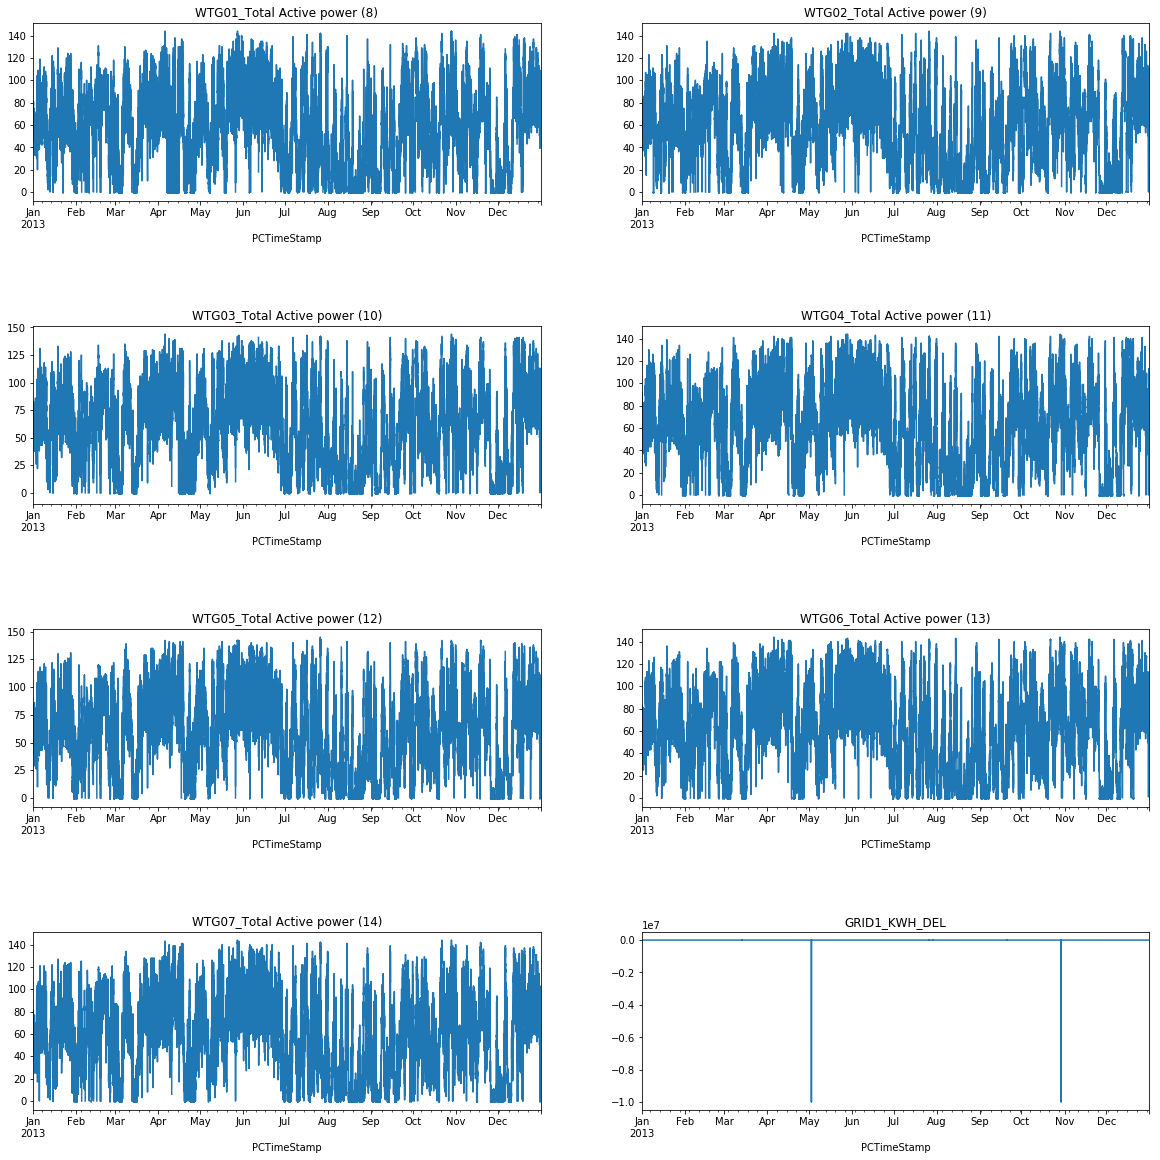

In [63]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
plt.subplots_adjust(hspace=0.7)

for i, column in enumerate(deltas.columns):
    x = i // 2
    y = i % 2
    deltas[column].plot(ax=axes[x, y], title=column)

### Fix the GRID1_KWH_DEL column

The `GRID1_KWH_DEL` column has two spots where the value is negative.
That's a consequence of the value reset that we have seen before.

In order to fix this, we will have a look at the original values at those points
to see if we can replace the negative values with them.

In [65]:
gkd_column = 'GRID1_KWH_DEL'

gkd = data[gkd_column]
gkd_delta = deltas[gkd_column]

In [67]:
gkd[gkd_delta < 0]

PCTimeStamp
2013-05-02 20:30:00    533.0
2013-10-29 13:30:00     78.0
Name: GRID1_KWH_DEL, dtype: float64

In [70]:
gkd_delta.describe().astype(int)

count      52496
mean          23
std        61720
min     -9999166
25%          217
50%          417
75%          584
max          964
Name: GRID1_KWH_DEL, dtype: int64

Both original values are within the observed delta range, so it feels
safe to assume that they represent the individual production value
that we are looking for.

In [73]:
deltas.loc[gkd_delta < 0, gkd_column] = gkd[gkd_delta < 0]

In [75]:
deltas[gkd_column].describe()

count    52496
mean       404
std        241
min          0
25%        217
50%        417
75%        584
max        964
Name: GRID1_KWH_DEL, dtype: int64

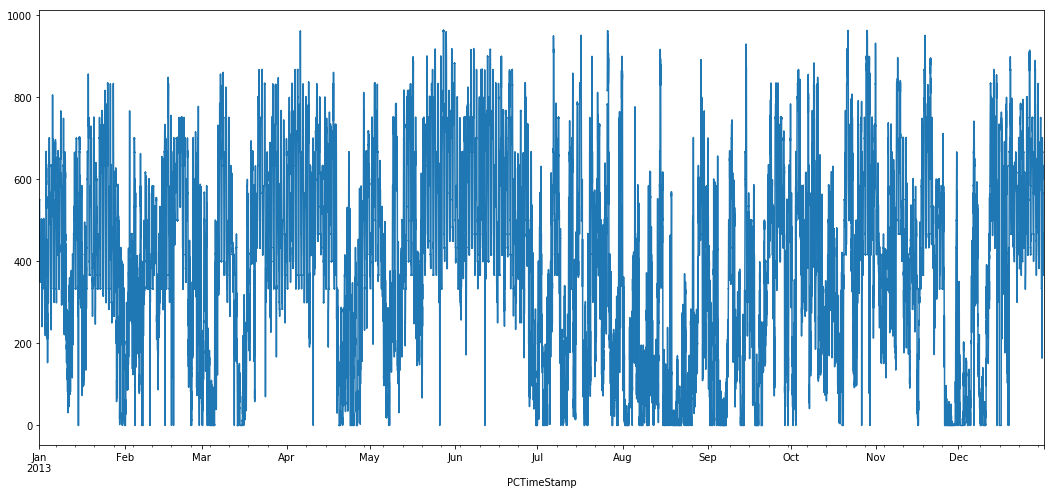

In [76]:
deltas[gkd_column].plot(figsize=(18, 8))

## Generating Prediction Labels

The `GRID1_KWH_DEL` column seems to be a measure of the KWH being produced by the grid at a given moment,
and looking at the previous graph we can see that it seems to be 0 at some points, so we want to have a
closer look at it.

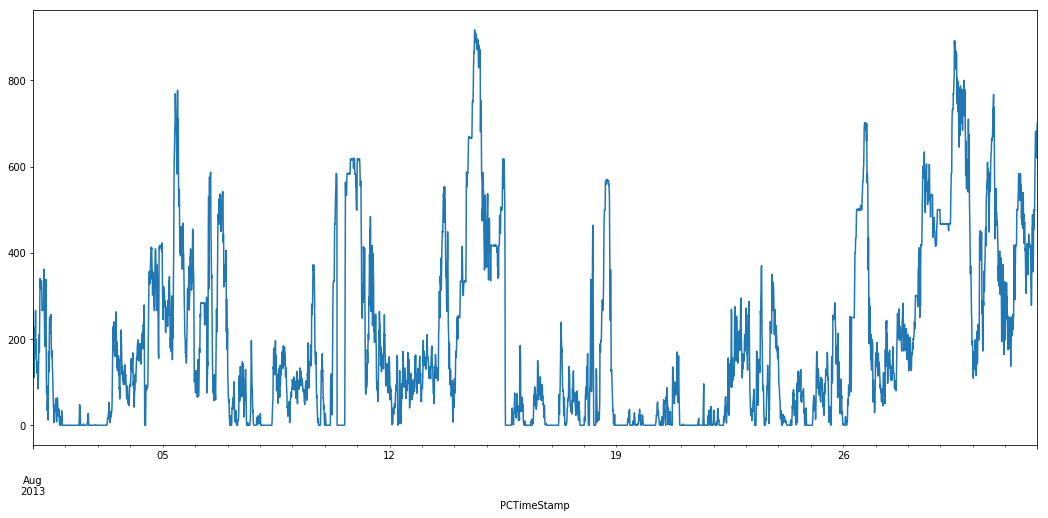

In [79]:
deltas[gkd_column].loc['2013-08-01':'2013-08-31'].plot(figsize=(18, 8))

### Zero Production

Since there seem to be many points where this value is 0, a good prediction problem could be
to predict whether the value will be 0 at any point during the next day.

For this, we will start by grouping the data in 24h periods and computing labels about whether
it is 0 at any point.

In [80]:
gkd = deltas[gkd_column]

In [82]:
gkd_zero = gkd == 0
gkd_zero.mean()

0.06267123287671234

In [85]:
labels = gkd_zero.resample('1D').max().astype(int)
labels.mean()

0.29041095890410956

## Format Data for GreenGuard

The next thing to do is making this data ready for GreenGuard by giving it the required format.

This means that we need these 4 tables:

* A **Turbines** table that contains:
  * `turbine_id`: column with the unique id of each turbine.
  * A number of additional columns with information about each turbine.
* A **Signals** table that contains:
  * `signal_id`: column with the unique id of each signal.
  * A number of additional columns with information about each signal.
* A **Readings** table that contains:
  * `reading_id`: Unique identifier of this reading.
  * `turbine_id`: Unique identifier of the turbine which this reading comes from.
  * `signal_id`: Unique identifier of the signal which this reading comes from.
  * `timestamp`: Time where the reading took place, as an ISO formatted datetime.
  * `value`: Numeric value of this reading.
* A **Targets** table that contains:
  * `target_id`: Unique identifier of the turbine which this label corresponds to.
  * `turbine_id`: Unique identifier of the turbine which this label corresponds to.
  * `timestamp`: Time associated with this target
  * `target`: The value that we want to predict. This can either be a numerical value or a categorical label.

### Tubrines

In this case we are considering that each column is a different signals from a single turbine,
for which we don't have any additional information.

This means that the turbines table will be very simple.

In [89]:
turbines = pd.DataFrame([
    {'turbine_id': 1, 'name': 'Turbine 1'}
], columns=['turbine_id', 'name'])

In [90]:
turbines.head()

,turbine_id,name
0,1,Turbine 1


### Signals

We consider each column a different signal, so we will generate an ID for each one of them
and set their name to be the column name

In [92]:
signals = pd.DataFrame(data.columns, columns=['name'])

In [93]:
signals.index.name = 'signal_id'
signals.reset_index(inplace=True)
signals.signal_id += 1
signals.head()

,signal_id,name
0,1,WTG01_Grid Production PossiblePower Avg. (1)
1,2,WTG02_Grid Production PossiblePower Avg. (2)
2,3,WTG03_Grid Production PossiblePower Avg. (3)
3,4,WTG04_Grid Production PossiblePower Avg. (4)
4,5,WTG05_Grid Production PossiblePower Avg. (5)


### Readings

For the readings table we will need to manipulate our data as follows:

1. Replace the column names by the singal_ids.
2. Stack the data.
3. Rename the indexes to `timestamp` and `signal_id` and reset them back to columns.
4. Rename the series to `value`.
5. Add a `turbine_id` column with constant value 1.
6. Resort the rows by `timestamp` and `signal_id`.
7. Add a `reading_id` column as a unique id.
8. Resort the columns.

In [115]:
readings = data.copy()
readings.columns = range(1, len(data.columns) + 1)
readings.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
PCTimeStamp,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,817.0,805.0,786.0,809.0,755.0,745.0,743.0,3109970.0,609852.0,3254759.0,3341303.0,3230186.0,3264175.0,3136754.0,11.3,8.1,14.5,2510065.0
2013-01-01 00:10:00,732.0,790.0,763.0,809.0,771.0,758.0,811.0,3110050.0,609933.0,3254839.0,3341384.0,3230266.0,3264255.0,3136835.0,12.0,9.1,15.4,2510615.0
2013-01-01 00:20:00,764.0,774.0,793.0,821.0,736.0,668.0,656.0,3110130.0,610014.0,3254920.0,3341465.0,3230346.0,3264336.0,3136914.0,11.6,7.1,16.7,2511165.0
2013-01-01 00:30:00,773.0,769.0,759.0,813.0,627.0,717.0,752.0,3110211.0,610095.0,3255002.0,3341546.0,3230421.0,3264417.0,3136994.0,11.8,9.4,14.2,2511714.0
2013-01-01 00:40:00,689.0,690.0,711.0,800.0,749.0,749.0,723.0,3110288.0,610176.0,3255083.0,3341628.0,3230501.0,3264499.0,3137075.0,11.2,8.1,14.3,2512265.0


In [116]:
readings = readings.stack()
readings.index.names = ['timestamp', 'signal_id']
readings.name = 'value'
readings = readings.reset_index()
readings.head()

,timestamp,signal_id,value
0,2013-01-01,1,817.0
1,2013-01-01,2,805.0
2,2013-01-01,3,786.0
3,2013-01-01,4,809.0
4,2013-01-01,5,755.0


In [117]:
readings['turbine_id'] = 1
readings.sort_values(['timestamp', 'signal_id'], inplace=True)
readings['reading_id'] = range(1, len(readings) + 1)
readings.reset_index(inplace=True)
readings = readings[[
    'reading_id',
    'turbine_id',
    'signal_id',
    'timestamp',
    'value'
]].copy()
readings.head()

,reading_id,turbine_id,signal_id,timestamp,value
0,1,1,1,2013-01-01,817.0
1,2,1,2,2013-01-01,805.0
2,3,1,3,2013-01-01,786.0
3,4,1,4,2013-01-01,809.0
4,5,1,5,2013-01-01,755.0


### Targets

To generate the targets we will manipulate the labels as follows:

1. Shift the labels by one place.
2. Fill the gap with a 0.
3. Rename the series as `target`.
4. Convert the indes to a `timestamp` column.
5. Reset the index to have a DataFrame with two columns.
6. Add a `turbine_id` column with constant value 1.
7. Add a `target_id` column as a unique id.
8. Reorder the columns.

In [119]:
targets = labels.shift(1).fillna(0).copy()
targets.name = 'target'
targets.index.name = 'timestamp'
targets = targets.reset_index()
targets['turbine_id'] = 1
targets['target_id'] = range(1, len(targets) + 1)
targets = targets[[
    'target_id',
    'turbine_id',
    'timestamp',
    'target'
]]
targets.head()

,target_id,turbine_id,timestamp,target
0,1,1,2013-01-01,0.0
1,2,1,2013-01-02,0.0
2,3,1,2013-01-03,0.0
3,4,1,2013-01-04,0.0
4,5,1,2013-01-05,0.0


### Storing the data as CSV files

Finally, we store the 4 tables as CSV files.

In [121]:
turbines.to_csv('turbines.csv', index=False)
signals.to_csv('signals.csv', index=False)
readings.to_csv('readings.csv', index=False)
targets.to_csv('targets.csv', index=False)